### Feature Extraction with Eigen Face

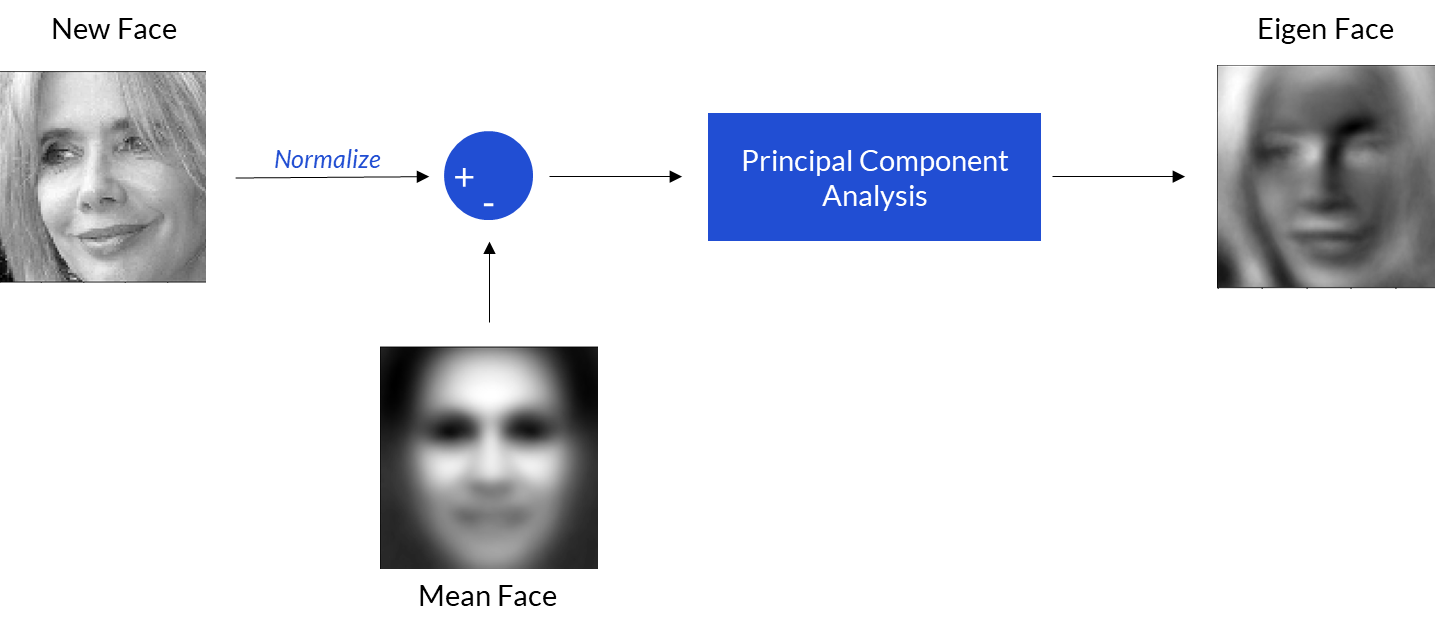

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2

## Eigen Face
from sklearn.decomposition import PCA 

import pickle

In [25]:
# Load the data
data = pickle.load(open('./data/data_images_300_300.pickle',mode='rb')) # load the data

In [26]:
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_89991,pixel_89992,pixel_89993,pixel_89994,pixel_89995,pixel_89996,pixel_89997,pixel_89998,pixel_89999,name
1,0.011765,0.011765,0.027451,0.050980,0.078431,0.101961,0.098039,0.090196,0.082353,0.074510,...,0.184314,0.188235,0.188235,0.192157,0.192157,0.192157,0.192157,0.192157,0.192157,Henry
2,0.454902,0.368627,0.243137,0.309804,0.396078,0.513725,0.490196,0.423529,0.498039,0.498039,...,0.211765,0.223529,0.196078,0.176471,0.176471,0.176471,0.180392,0.184314,0.188235,Henry
3,0.129412,0.141176,0.164706,0.215686,0.266667,0.266667,0.250980,0.254902,0.223529,0.145098,...,0.011765,0.011765,0.011765,0.007843,0.007843,0.007843,0.007843,0.011765,0.011765,Henry
4,0.403922,0.403922,0.403922,0.403922,0.396078,0.392157,0.388235,0.380392,0.376471,0.388235,...,0.023529,0.031373,0.039216,0.039216,0.031373,0.027451,0.023529,0.023529,0.023529,Henry
5,0.168627,0.168627,0.180392,0.184314,0.184314,0.180392,0.168627,0.149020,0.129412,0.113725,...,0.149020,0.141176,0.129412,0.121569,0.113725,0.109804,0.109804,0.113725,0.113725,Henry


##### Eigen Face

In [27]:
# Mean Face
X = data.drop('name',axis=1).values # all images

In [28]:
X

array([[0.01176471, 0.01176471, 0.02745098, ..., 0.19215686, 0.19215686,
        0.19215686],
       [0.45490196, 0.36862745, 0.24313725, ..., 0.18039216, 0.18431373,
        0.18823529],
       [0.12941176, 0.14117647, 0.16470588, ..., 0.00784314, 0.01176471,
        0.01176471],
       ...,
       [0.45882353, 0.47058824, 0.48235294, ..., 0.01960784, 0.02352941,
        0.01960784],
       [0.99607843, 0.99215686, 0.99215686, ..., 0.4627451 , 0.47843137,
        0.47058824],
       [0.0745098 , 0.0745098 , 0.07843137, ..., 0.0627451 , 0.0627451 ,
        0.05490196]])

In [29]:
mean_face = X.mean(axis=0) # flatten mean face
mean_face.shape

(90000,)

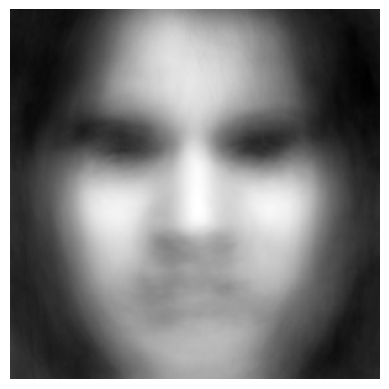

In [30]:
# visualize mean face
plt.imshow(mean_face.reshape((300,300)),cmap='gray')
plt.axis('off')
plt.show()

**Subtract data with mean face**

In [31]:
X_t = X - mean_face # transformed data

**Apply X_t data to PCA**

- Find the right number of component - Elbow
- With right number compnent computer Principal components

In [32]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')
pca.fit(X_t)

PCA(whiten=True)

In [33]:
exp_var_df = pd.DataFrame()
exp_var_df['explained_var'] = pca.explained_variance_ratio_
exp_var_df['cum_explained_var'] = exp_var_df['explained_var'].cumsum()
exp_var_df['principal_components'] = np.arange(1,len(exp_var_df)+1)

exp_var_df.head()

,explained_var,cum_explained_var,principal_components
0,0.247525,0.247525,1
1,0.124953,0.372478,2
2,0.105953,0.478431,3
3,0.049098,0.527528,4
4,0.045742,0.573270,5


In [34]:
exp_var_df.set_index('principal_components',inplace=True)

<Axes: xlabel='principal_components'>

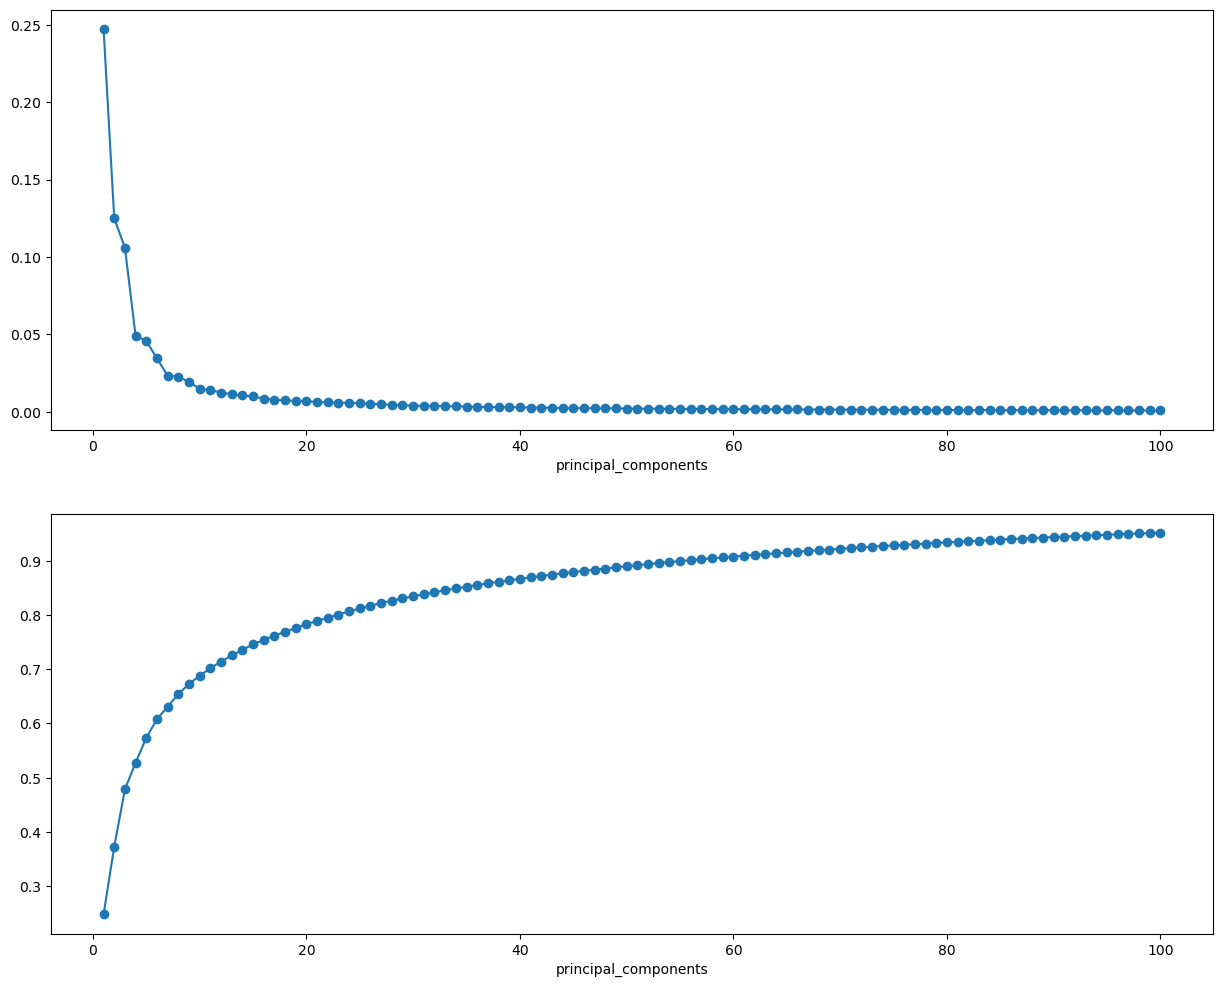

In [35]:
# visualize explained variance
fig, ax = plt.subplots(nrows=2,figsize=(15,12))

exp_var_df['explained_var'].head(100).plot(kind='line',marker='o',ax=ax[0])
exp_var_df['cum_explained_var'].head(100).plot(kind='line',marker='o',ax=ax[1])

From above plot, it is clear that with approximately **30 pricipal components having 80%** converage.

In [37]:
pca_30 = PCA(n_components=30,whiten=True,svd_solver='auto')
pca_data = pca_30.fit_transform(X_t)

In [38]:
pca_data.shape

(262, 30)

In [39]:
# saving data and models
y = data['name'].values # independent variables
np.savez('./data/data_pca_30_target',pca_data,y)

In [40]:
# saving the model
pca_dict = {'pca':pca_30,'mean_face':mean_face}

In [41]:
pickle.dump(pca_dict,open('model/pca_dict.pickle','wb'))

### Visualize Eigen Image

In [42]:
pca_data_inv = pca_30.inverse_transform(pca_data)

In [43]:
pca_data_inv.shape

(262, 90000)

In [44]:
eig_img = pca_data_inv[0,:].reshape((300,300))
eig_img.shape

(300, 300)

(-0.5, 299.5, 299.5, -0.5)

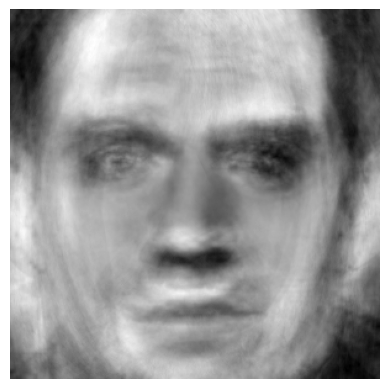

In [45]:
plt.imshow(eig_img,cmap='gray')
plt.axis('off')

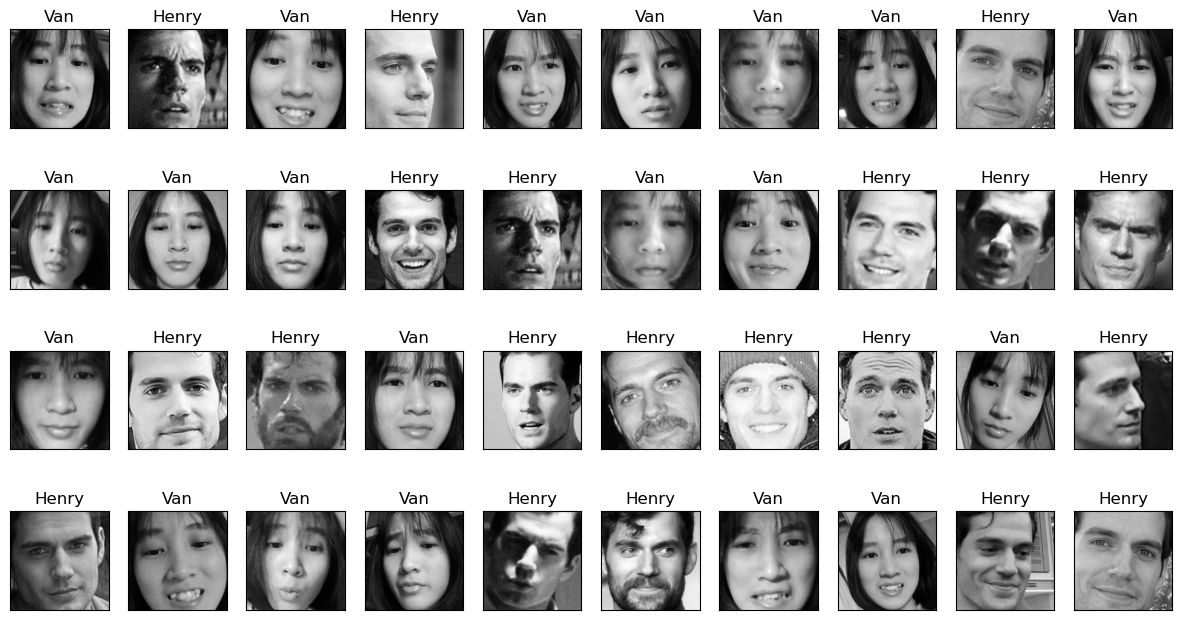

====================Eigen Images====================


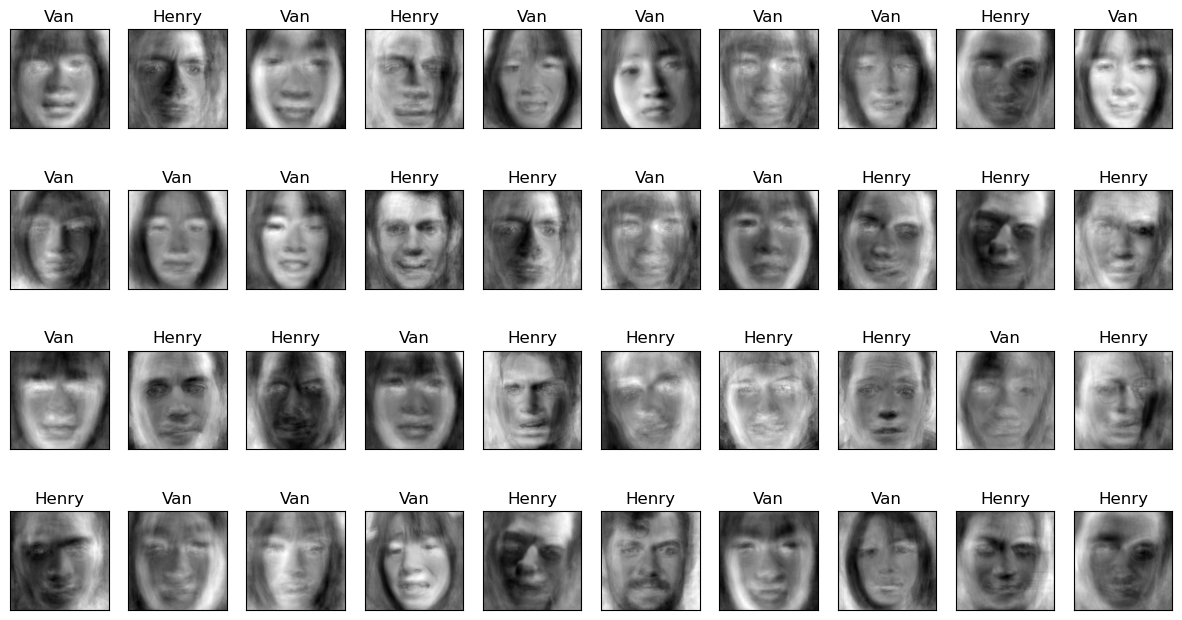

In [47]:
np.random.seed(1001)
pics = np.random.randint(0,262,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(300,300)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = pca_data_inv[pic:pic+1].reshape(300,300)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(y[pic]))
    plt.xticks([])
    plt.yticks([])
    
plt.show()